# Training data using VGG16 but using transfer learning

## Importing necessary modules

In [9]:
from keras.applications import VGG16
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten, Input, Rescaling
from keras.utils import plot_model, image_dataset_from_directory

## VGG16 model formation

In [3]:
conv_model = VGG16(
    include_top=False,
    weights="imagenet",
    input_shape=(200,200,3)
)

conv_model.trainable = False

In [4]:
conv_model.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 200, 200, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 200, 200, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 200, 200, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 100, 100, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 100, 100, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 100, 100, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 50, 50, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 50, 50, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 50, 50, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 50, 50, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 25, 25, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 25, 25, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 25, 25, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 25, 25, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 12, 12, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 12, 12, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 12, 12, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 12, 12, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 6, 6, 512)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 14,714,688 (56.13 MB)

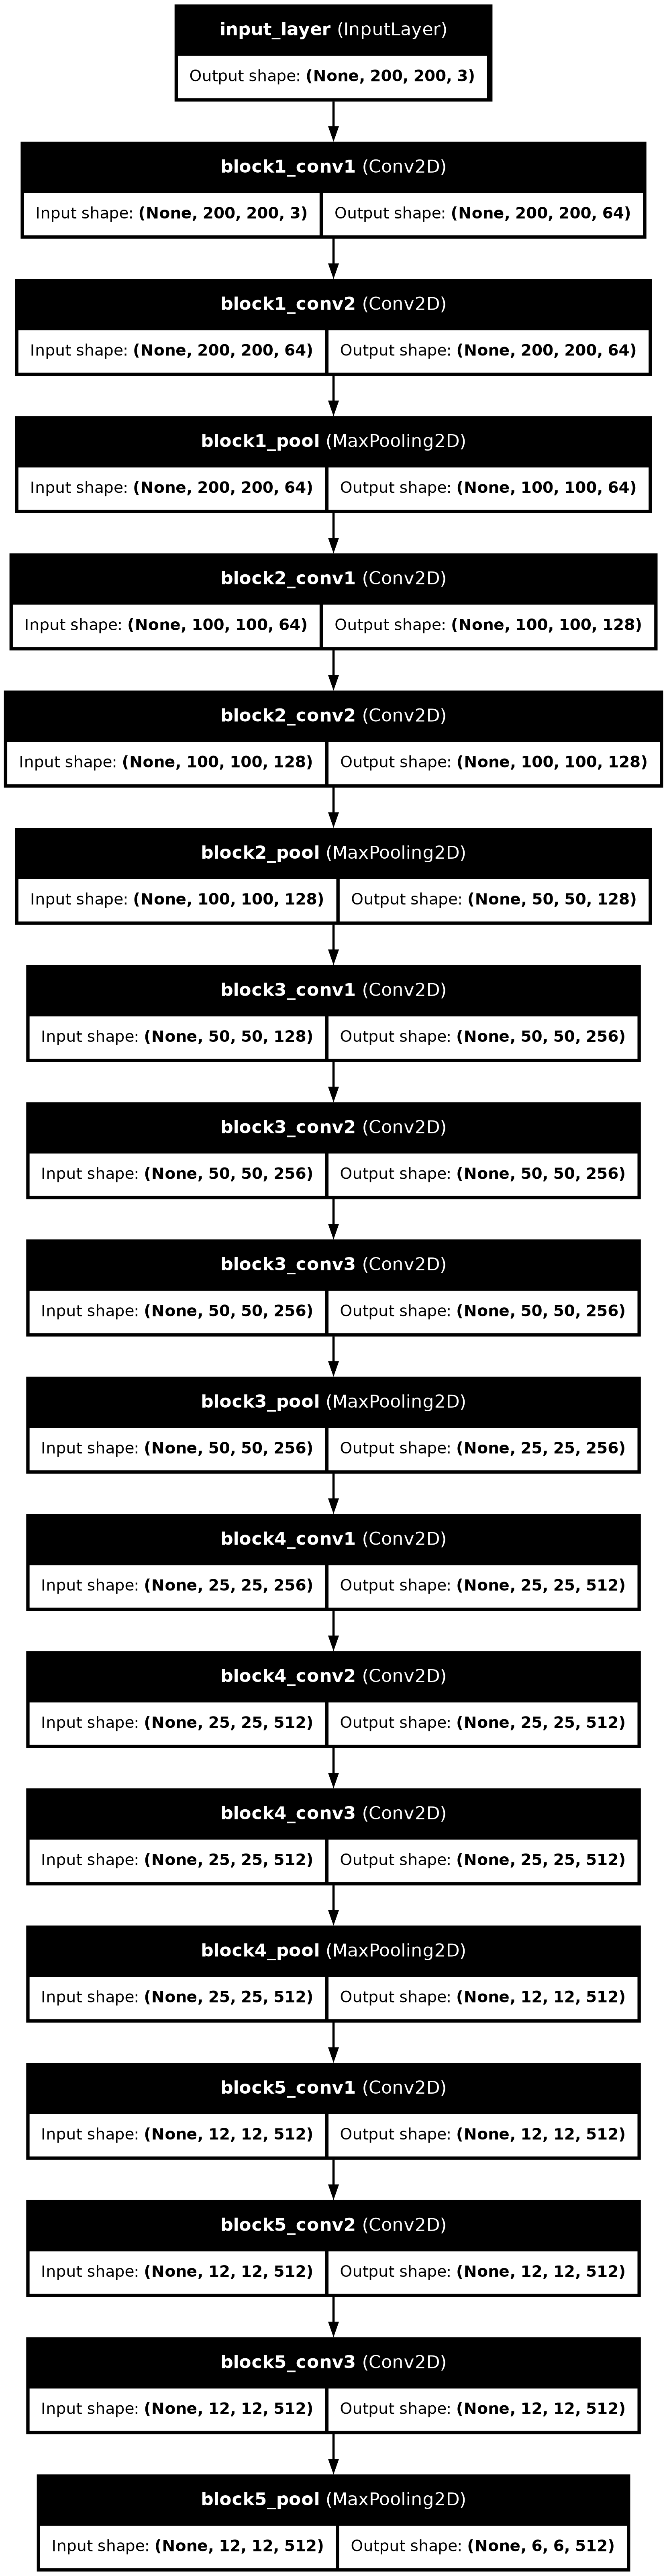

In [5]:
plot_model(conv_model, to_file='model.png', show_shapes=True, show_layer_names=True)

## Adding Fully connected layers

In [6]:
model = Sequential()

model.add(Input((200,200,3)))

model.add(Rescaling(1/255))

model.add(conv_model)

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [7]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)           │ (None, 200, 200, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ vgg16 (Functional)              │ (None, 6, 6, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 18432)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     2,359,424 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,082,433 (65.16 MB)

 Trainable params: 2,367,745 (9.03 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

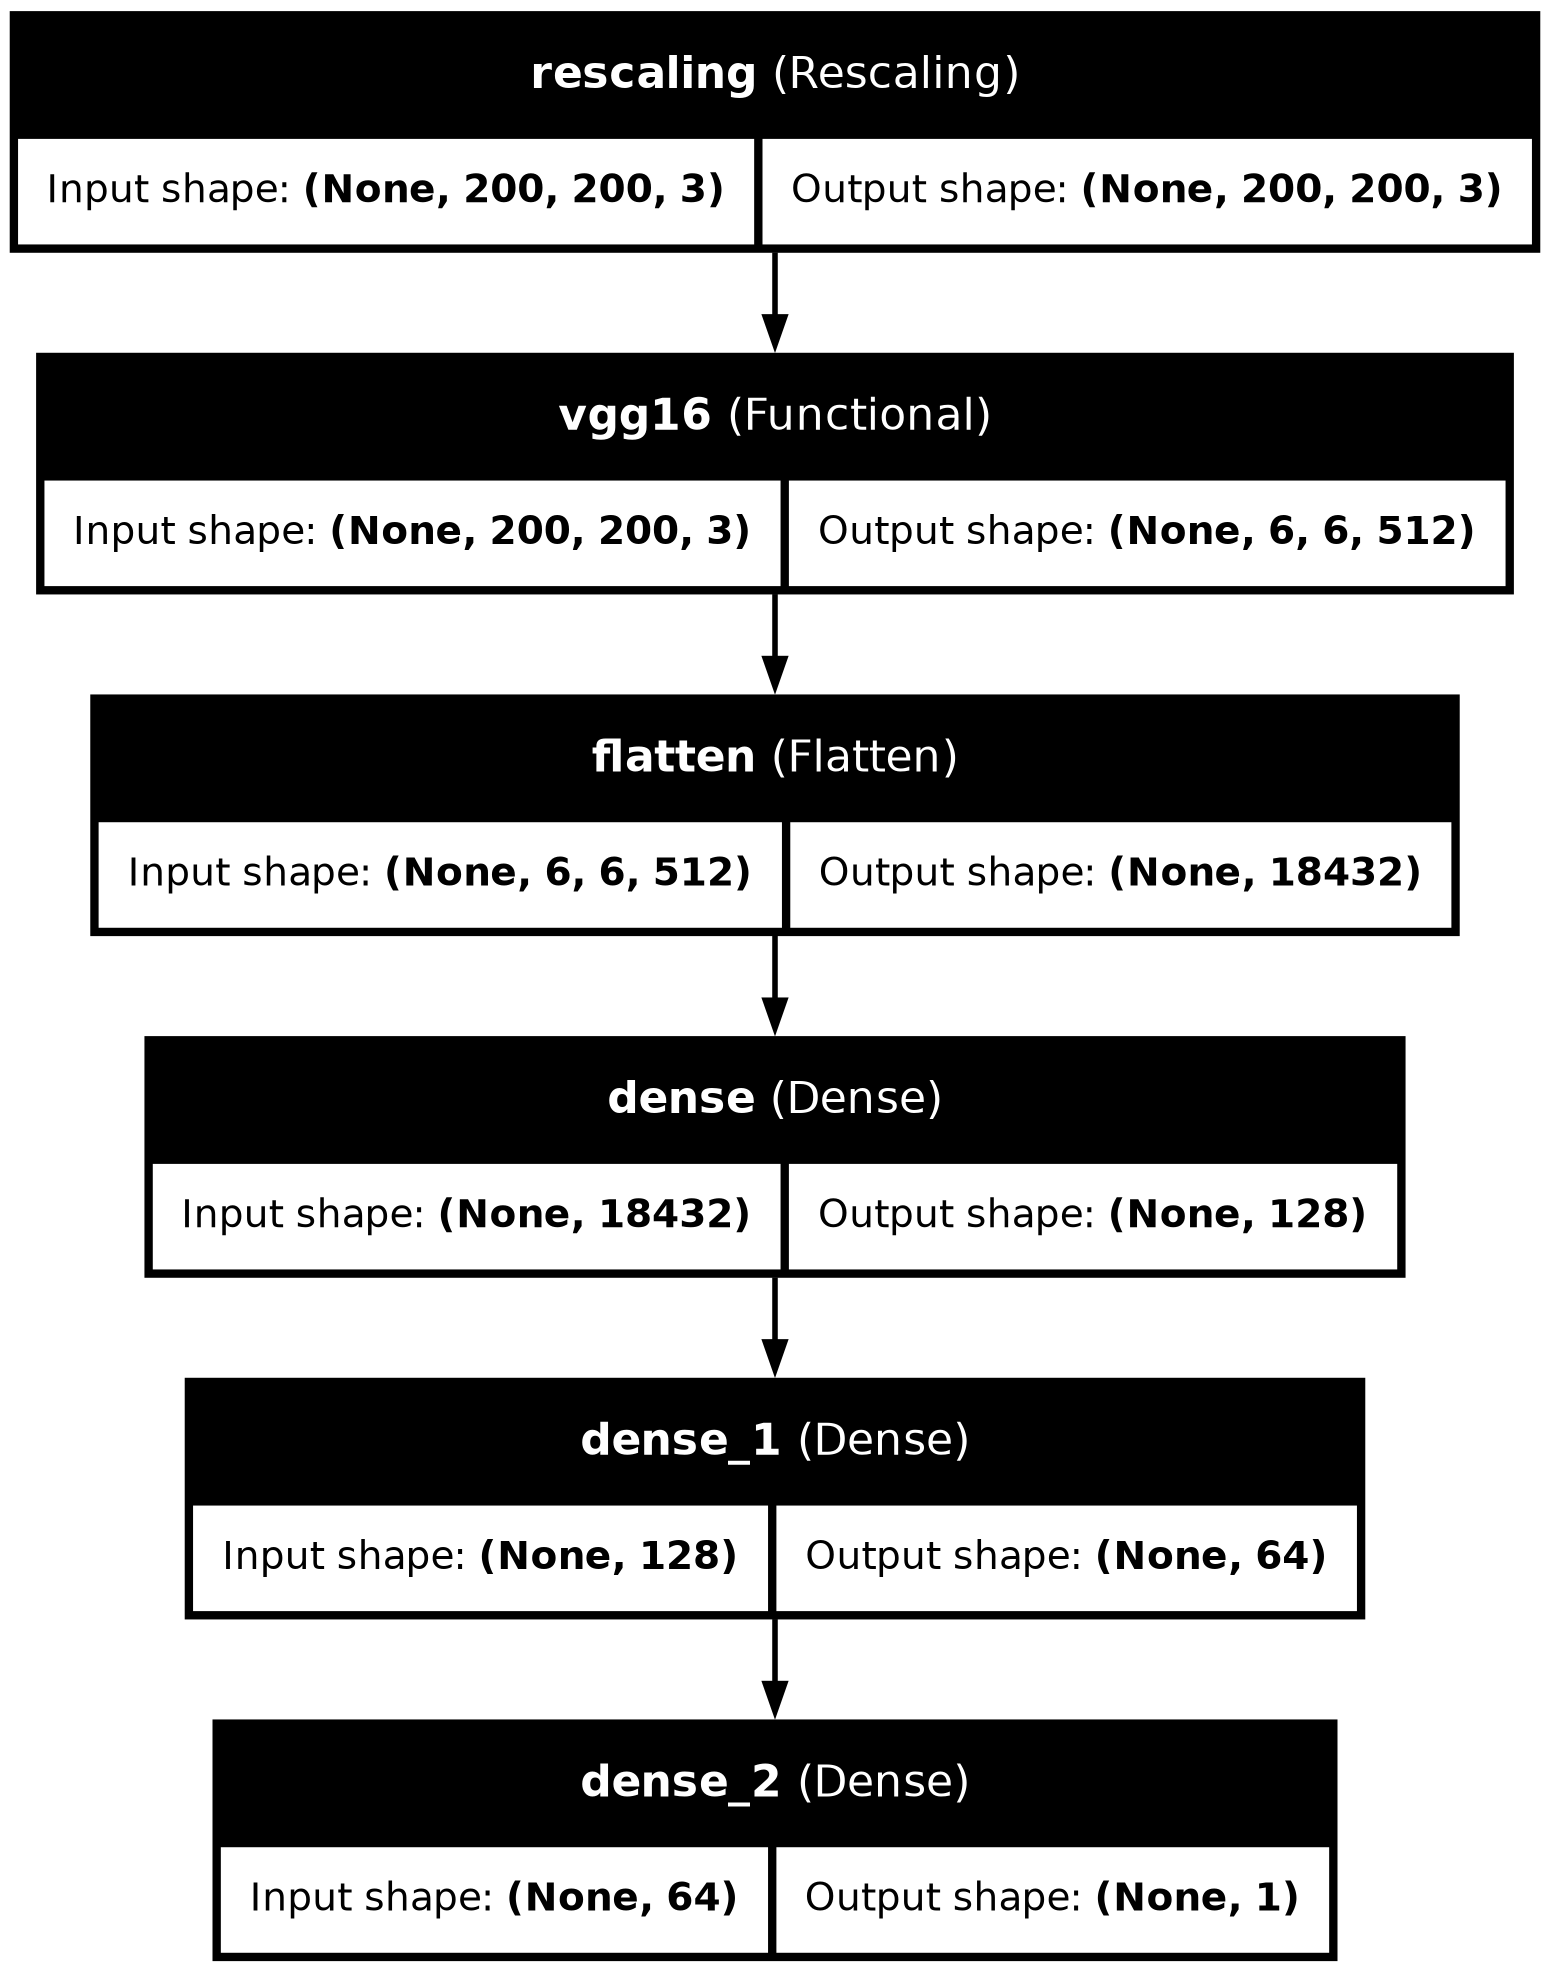

In [8]:
plot_model(model,show_shapes=True, show_layer_names=True)

## Preparing data

### Training data

In [13]:
train_ds = image_dataset_from_directory(
    directory='/kaggle/input/dogs-vs-cats/train',
    labels="inferred",
    label_mode="int",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(200, 200))

Found 20000 files belonging to 2 classes.


### Test data

In [14]:
test_ds = image_dataset_from_directory(
    directory='/kaggle/input/dogs-vs-cats/test',
    labels="inferred",
    label_mode="int",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(200, 200))

Found 5000 files belonging to 2 classes.


## Training the model

In [16]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [18]:
model.fit(train_ds, epochs=10, validation_data=test_ds)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.8422 - loss: 0.3785

2024-07-09 13:10:52.083712: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 0: 4.2321, expected 3.24819
2024-07-09 13:10:52.083772: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 1: 5.20095, expected 4.21704
2024-07-09 13:10:52.083788: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 2: 6.76199, expected 5.77808
2024-07-09 13:10:52.083805: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 3: 5.11574, expected 4.13182
2024-07-09 13:10:52.083821: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 4: 6.84323, expected 5.85932
2024-07-09 13:10:52.083831: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 5: 6.0227, expected 5.03879
2024-07-09 13:10:52.083842: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 6: 7.14931, expected 6.16539
2024-07-09 13:10:52.083852: E external/local_xla/xla/serv

625/625 ━━━━━━━━━━━━━━━━━━━━ 48s 77ms/step - accuracy: 0.8422 - loss: 0.3783 - val_accuracy: 0.9126 - val_loss: 0.2023
Epoch 2/10
  2/625 ━━━━━━━━━━━━━━━━━━━━ 34s 56ms/step - accuracy: 0.9062 - loss: 0.2290

W0000 00:00:1720530656.530476     886 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


625/625 ━━━━━━━━━━━━━━━━━━━━ 42s 67ms/step - accuracy: 0.9284 - loss: 0.1777 - val_accuracy: 0.9184 - val_loss: 0.1954
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 42s 67ms/step - accuracy: 0.9455 - loss: 0.1329 - val_accuracy: 0.9180 - val_loss: 0.2129
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 42s 67ms/step - accuracy: 0.9615 - loss: 0.0989 - val_accuracy: 0.9030 - val_loss: 0.2778
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 42s 67ms/step - accuracy: 0.9722 - loss: 0.0748 - val_accuracy: 0.8834 - val_loss: 0.4031
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 42s 67ms/step - accuracy: 0.9751 - loss: 0.0662 - val_accuracy: 0.9102 - val_loss: 0.3443
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 42s 67ms/step - accuracy: 0.9850 - loss: 0.0408 - val_accuracy: 0.9076 - val_loss: 0.3670
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 42s 67ms/step - accuracy: 0.9787 - loss: 0.0530 - val_accuracy: 0.9178 - val_loss: 0.3579
Epoch 9/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 42s 67ms/step - accuracy: 0.9923 - loss: 0.0216 - val_accurac

## The model is overfit as Training accuracy is 0.9862 and testing accuracy is 0.8882